## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets using pandas

In [4]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

## Converting the dates to datetime format 

In [6]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

## Exploratory Data Analysis (EDA)
## Checking for Missing values 

In [8]:
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


No missing Values found

## Summary statistics

In [11]:
print(customers_df.describe())
print(products_df.describe())
print(transactions_df.describe())

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

## Visualization of Customer Distribution by Region

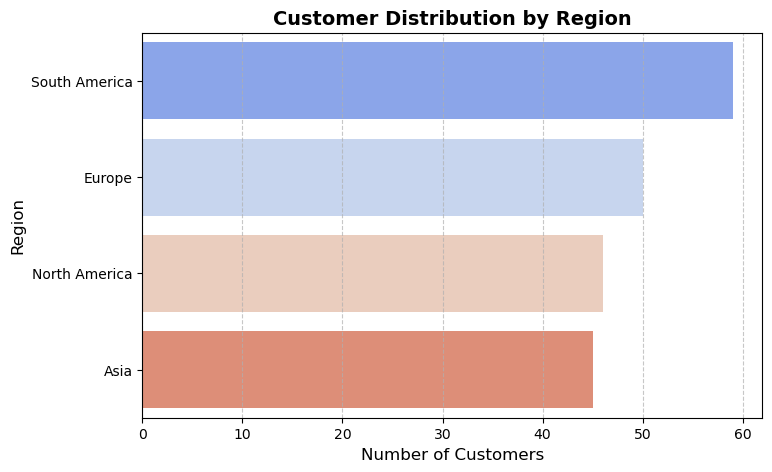

In [13]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette("coolwarm", len(customers_df["Region"].unique()))
sns.barplot(x=customers_df["Region"].value_counts().values, y=customers_df["Region"].value_counts().index, palette=colors)
plt.title("Customer Distribution by Region", fontsize=14, fontweight='bold')
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Top-selling products by Quantity

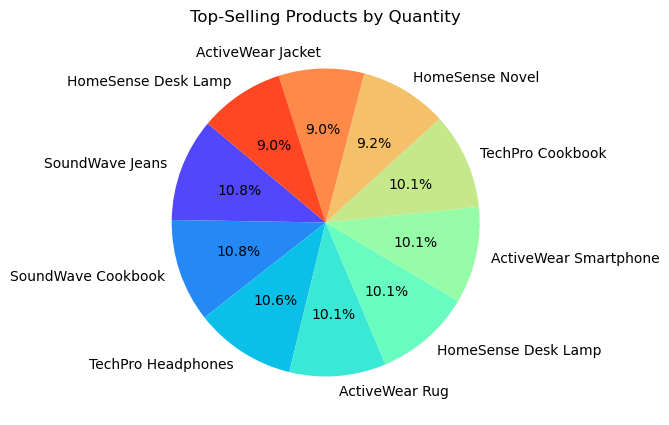

In [15]:
top_products = transactions_df.groupby("ProductID")["Quantity"].sum().reset_index()
top_products = top_products.merge(products_df, on="ProductID").sort_values(by="Quantity", ascending=False).head(10)
plt.figure(figsize=(10, 5))
colors = sns.color_palette("rainbow", len(top_products))
plt.pie(top_products["Quantity"], labels=top_products["ProductName"], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Top-Selling Products by Quantity")
plt.show()

## Monthly Sales Trend Visualization

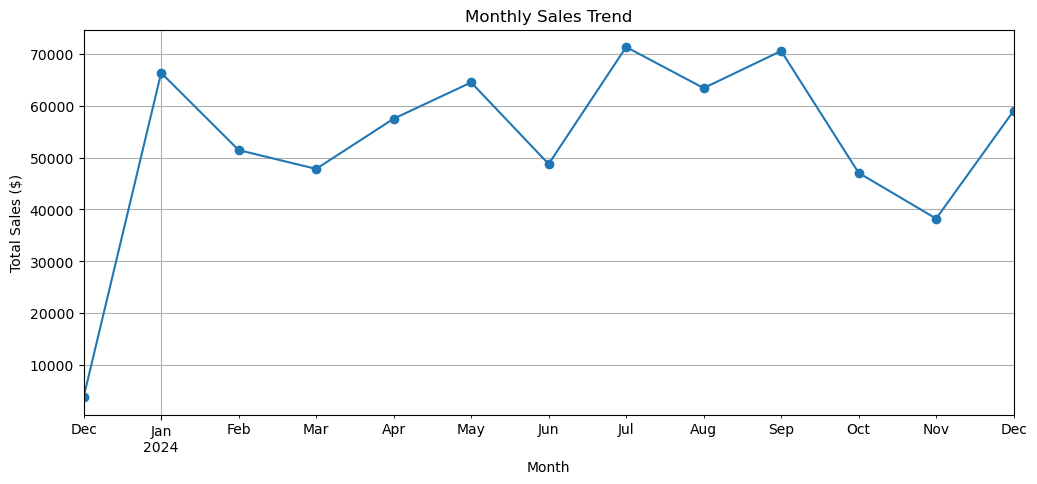

In [17]:
transactions_df["TransactionMonth"] = transactions_df["TransactionDate"].dt.to_period("M")
monthly_sales = transactions_df.groupby("TransactionMonth")["TotalValue"].sum()
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

## Customer Purchase Behavior Analysis

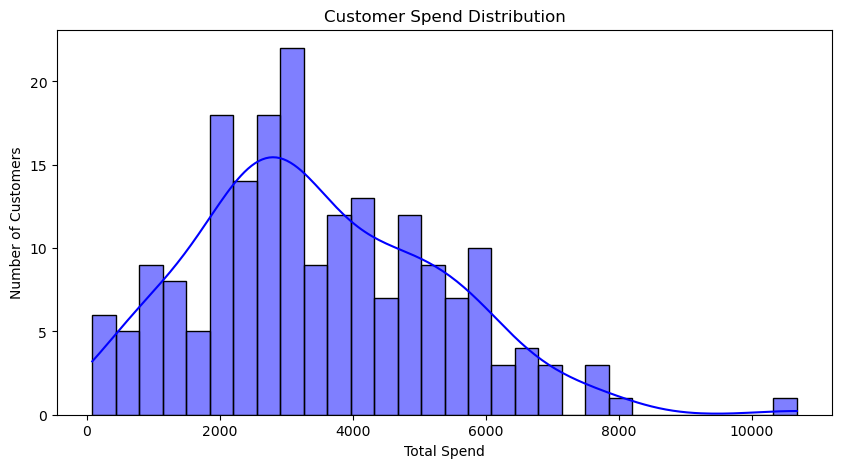

In [19]:
customer_spend = transactions_df.groupby("CustomerID")["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.histplot(customer_spend["TotalValue"], bins=30, kde=True, color="blue")
plt.title("Customer Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.show()

## Visualization Product Popularity by Region

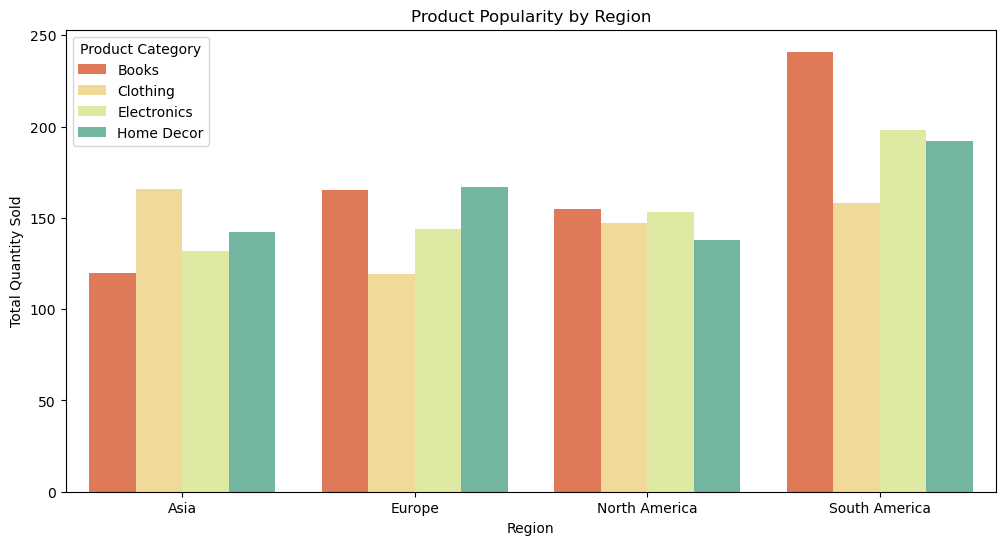

In [21]:
region_product_sales = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")
region_product_group = region_product_sales.groupby(["Region", "Category"]).agg({"Quantity": "sum"}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=region_product_group, x="Region", y="Quantity", hue="Category", palette="Spectral")
plt.title("Product Popularity by Region")
plt.xlabel("Region")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Product Category")
plt.show()
